In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [167]:
df=pd.read_excel('antenna.xlsx')
df.head(10)

,L(mm),W(mm),h(mm),Er,f
0,20.0,26.0,1.60,4.4,3.46
1,20.0,26.0,1.20,4.4,3.74
2,20.0,26.0,1.25,4.4,3.68
3,20.0,26.0,1.30,4.4,3.51
4,20.0,26.0,1.35,4.4,3.55
5,20.0,26.0,1.40,4.4,3.48
6,20.0,26.0,1.45,4.4,3.62
7,20.0,26.0,1.50,4.4,3.50
8,20.0,26.0,1.55,4.4,3.42
9,20.0,26.0,1.60,4.4,3.48


In [168]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [169]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

X_test

,L(mm),W(mm),h(mm),Er
18,20.00,26.00,2.05,4.40
169,20.00,26.00,1.60,5.30
106,22.00,30.00,1.60,4.40
92,21.30,29.30,1.60,4.40
176,20.50,26.50,1.60,4.40
183,21.20,27.20,1.60,4.75
5,20.00,26.00,1.40,4.40
139,23.65,31.65,1.60,4.40
12,20.00,26.00,1.75,4.40
160,20.00,26.00,1.60,4.85


In [170]:
y_test

18     3.40
169    3.21
106    3.09
92     3.37
176    3.45
183    3.15
5      3.48
139    3.12
12     3.47
160    3.32
61     3.47
124    2.98
164    3.24
145    2.88
80     3.11
7      3.50
33     3.85
129    3.11
37     3.79
74     3.41
159    3.41
144    2.97
45     3.62
158    3.39
60     3.49
122    3.01
178    3.38
184    3.21
97     3.48
44     3.58
16     3.52
55     3.48
83     3.47
110    3.13
22     3.58
188    2.95
135    2.91
4      3.55
137    2.91
193    2.89
Name: f, dtype: float64

In [171]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
X_train=SC.fit_transform(X_train)
X_test=SC.transform(X_test)

In [172]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [173]:
reg=Sequential()
reg.add(Dense(units=5,kernel_initializer='he_uniform',activation='relu',input_dim=4))
reg.add(Dense(units=4,kernel_initializer='he_uniform',activation='relu'))
reg.add(Dense(units=4,kernel_initializer='he_uniform',activation='relu'))
reg.add(Dense(units=1,kernel_initializer='he_uniform',activation='linear'))

reg.compile(optimizer = 'adam', loss ='mean_absolute_error', metrics = ['mse'])
model=reg.fit(X_train, y_train,validation_data=(X_test,y_test),epochs = 250)

Epoch 1/250
5/5 [==============================] - 1s 70ms/step - loss: 2.6686 - mse: 8.5129 - val_loss: 2.5325 - val_mse: 8.0878
Epoch 2/250
5/5 [==============================] - 0s 11ms/step - loss: 2.4887 - mse: 7.7841 - val_loss: 2.5023 - val_mse: 7.8872
Epoch 3/250
5/5 [==============================] - 0s 11ms/step - loss: 2.5975 - mse: 8.1127 - val_loss: 2.4770 - val_mse: 7.6908
Epoch 4/250
5/5 [==============================] - 0s 11ms/step - loss: 2.5176 - mse: 7.6449 - val_loss: 2.4503 - val_mse: 7.4890
Epoch 5/250
5/5 [==============================] - 0s 11ms/step - loss: 2.5003 - mse: 7.5011 - val_loss: 2.4202 - val_mse: 7.2795
Epoch 6/250
5/5 [==============================] - 0s 11ms/step - loss: 2.2758 - mse: 6.6630 - val_loss: 2.3851 - val_mse: 7.0584
Epoch 7/250
5/5 [==============================] - 0s 11ms/step - loss: 2.3336 - mse: 6.7869 - val_loss: 2.3477 - val_mse: 6.8270
Epoch 8/250
5/5 [==============================] - 0s 12ms/step - loss: 2.3244 - mse: 6.75

5/5 [==============================] - 0s 10ms/step - loss: 0.1575 - mse: 0.0493 - val_loss: 0.1599 - val_mse: 0.0628
Epoch 126/250
5/5 [==============================] - 0s 10ms/step - loss: 0.1565 - mse: 0.0453 - val_loss: 0.1588 - val_mse: 0.0621
Epoch 127/250
5/5 [==============================] - 0s 10ms/step - loss: 0.1708 - mse: 0.0524 - val_loss: 0.1567 - val_mse: 0.0611
Epoch 128/250
5/5 [==============================] - 0s 10ms/step - loss: 0.1749 - mse: 0.0581 - val_loss: 0.1538 - val_mse: 0.0602
Epoch 129/250
5/5 [==============================] - 0s 10ms/step - loss: 0.1631 - mse: 0.0497 - val_loss: 0.1523 - val_mse: 0.0595
Epoch 130/250
5/5 [==============================] - 0s 9ms/step - loss: 0.1636 - mse: 0.0533 - val_loss: 0.1515 - val_mse: 0.0597
Epoch 131/250
5/5 [==============================] - 0s 10ms/step - loss: 0.1542 - mse: 0.0451 - val_loss: 0.1493 - val_mse: 0.0589
Epoch 132/250
5/5 [==============================] - 0s 10ms/step - loss: 0.1444 - mse: 0.0

5/5 [==============================] - 0s 11ms/step - loss: 0.1016 - mse: 0.0212 - val_loss: 0.1102 - val_mse: 0.0233
Epoch 250/250
5/5 [==============================] - 0s 11ms/step - loss: 0.1104 - mse: 0.0237 - val_loss: 0.1098 - val_mse: 0.0232


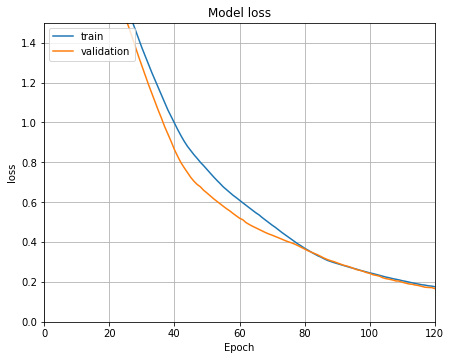

In [177]:
def plot_loss(model):
    plt.figure(figsize=(7,5.5))
    plt.plot(model.history['loss'],label='loss')
    plt.plot(model.history['val_loss'],label='val_loss')
    plt.ylim([0,1.5])
    plt.xlim([0,120])
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.title('Model loss')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.grid(True)
    
plot_loss(model)

In [178]:
loss,mae=reg.evaluate(X_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.1098 - mse: 0.0232


In [179]:
hist=pd.DataFrame(model.history)
hist['epoch']=model.epoch
hist

,loss,mse,val_loss,val_mse,epoch
0,2.600610,8.277471,2.532465,8.087834,0
1,2.553978,8.023397,2.502305,7.887215,1
2,2.510303,7.786551,2.477019,7.690784,2
3,2.472559,7.568190,2.450308,7.488959,3
4,2.431525,7.351497,2.420178,7.279510,4
...,...,...,...,...,...
245,0.109665,0.023010,0.113561,0.024800,245
246,0.108930,0.022724,0.112566,0.023812,246
247,0.108917,0.022431,0.111228,0.023647,247
248,0.108767,0.022418,0.110211,0.023332,248


In [180]:
result=reg.predict(X_test)
result

array([[3.0445619],
       [3.2118902],
       [3.1570315],
       [3.259594 ],
       [3.4470248],
       [3.1587272],
       [3.322544 ],
       [2.9152784],
       [3.6501756],
       [3.3008318],
       [3.5512176],
       [3.025166 ],
       [3.261302 ],
       [2.942862 ],
       [3.3475037],
       [3.4556756],
       [3.6485496],
       [2.9885373],
       [3.6485496],
       [3.3669004],
       [3.3107138],
       [2.935536 ],
       [3.6485496],
       [3.3205962],
       [3.5653954],
       [3.0398178],
       [3.8330483],
       [3.135356 ],
       [3.2229643],
       [3.6485496],
       [3.146747 ],
       [3.6362867],
       [3.3255262],
       [3.1277285],
       [3.4040203],
       [3.04187  ],
       [2.9445815],
       [3.4884338],
       [2.9299302],
       [2.9250126]], dtype=float32)